<a href="https://colab.research.google.com/github/soyudea/Optimizacion/blob/main/NewtonRaphson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

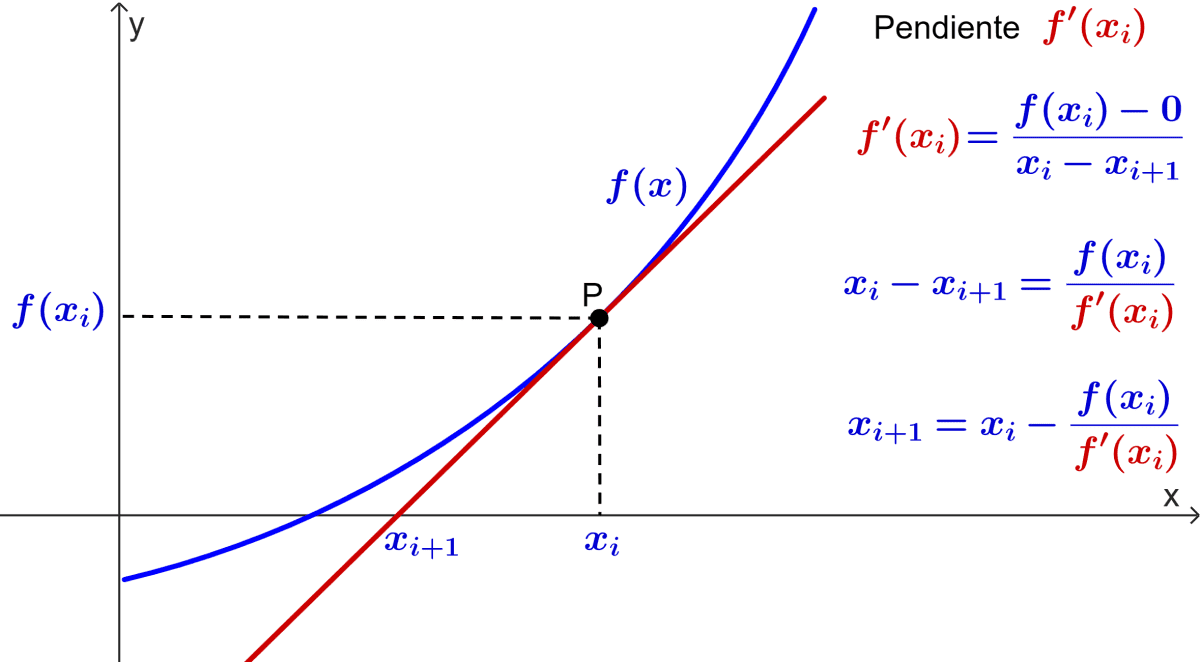

**Carga de librerías**

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols
from sympy import diff
from sympy import sin
from sympy import cos
from scipy.misc import derivative

**Ingreso valor inicial**

In [ ]:
x0  = float(input("Ingrese la frontera inferior del intervalo x0 "))
err = float(input("Ingrese valor del error aceptable "))

**Grafica de f(x)  = 2*sen(x= - x^2/10)**

In [ ]:
xl = 0
xu = 8

def graf_f():
  X = list(np.arange(xl, xu, 0.01))
  Y=[(2*math.sin(x) -(x**2)/10) for x in X]

  plt.title("Funcion")
  plt.xlabel("f(x) = 2*sin(x) - x^2/10")
  plt.ylabel("Y")
  plt.plot(X,Y, "r--")
  plt.axhline( 1.77572565314742, xmin=0, color="g")
  plt.grid()
  plt.show()